In [1]:
import torch as t
from torch import nn
from torch.autograd import Variable as V

In [2]:
t.__version__

'0.2.0_3'

In [14]:
class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__() # 等价于 nn.Module.__init__(self)
        self.w = nn.Parameter(t.randn(in_features, out_features))
        self.b = nn.Parameter(t.randn(out_features))
        
    def forward(self, x):
        x = x.mm(self.w)
        return x + self.b.expand_as(x)

In [15]:
layer = Linear(4, 3)
input = V(t.randn(2, 4))
output = layer(input)
output

Variable containing:
 0.3683 -0.2602 -3.1196
 1.3959  3.5604 -0.9798
[torch.FloatTensor of size 2x3]

In [16]:
for name, parameter in layer.named_parameters():
    print('66',name,parameter) # w and b

66 w Parameter containing:
-0.4016  0.0798  0.4489
 0.8859 -0.9791 -0.2076
 0.2629 -1.7120 -1.5918
-1.7168 -1.0102 -0.3158
[torch.FloatTensor of size 4x3]

66 b Parameter containing:
 2.1466
 0.3746
-2.8969
[torch.FloatTensor of size 3]



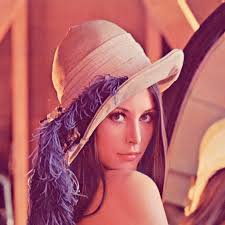

In [82]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor() # img -> tensor
to_pil = ToPILImage()
lena = Image.open('../imgs/lena.jpg')
lena # 程序输出如下

In [ ]:
# 输入是一个 batch， batch_size = 1
input = to_tensor(lena).unsqueeze(0)
#锐化卷积核
kernel = t.ones(3 , 3) / -9.
kernel[1][1] = 1
conv = nn.Conv2d(1, 1, (3, 3), 1, bias = False)
conv.weight.data = kernel.view(1, 1, 3, 3)

out = conv(V(input))
to_pil(out.data.squeeze(0)) # 程序输出如下图

In [ ]:
# 除了卷积层和池化层，深度学习还常用到一下几个层：
# Liear ： 全连接层
# BtchNorm: 批规范化层， 分为 1D， 2D， 3D；处理标准的 BatchNorm 之外
# 还有在风格迁移常用到的 InstanceNorm 层
# Droupt : 用来防止过拟合，同样分为 1D，2D，3D

In [35]:
# 输入  batch_size = 2, 维度为 3
input = V(t.randn(2, 3))
linear = nn.Linear(3, 4)
h = linear(input)
h

Variable containing:
 0.5824  0.1323 -0.5072 -0.4071
-0.2995  0.0119  0.1454  0.4838
[torch.FloatTensor of size 2x4]

In [36]:
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4) * 4
bn.bias.data = t.zeros(4)
bn_out = bn(h)
# 注意输出的均值和方差
# 方差是标注差的平方， 计算无偏方差分母会减 1
# 使用 unbiased = False, 分母不会减 1
bn_out.mean(0), bn_out.var(0, unbiased = False)

(Variable containing:
 1.00000e-07 *
   0.0000
   2.3842
   0.0000
   0.0000
 [torch.FloatTensor of size 4], Variable containing:
  15.9992
  15.9560
  15.9985
  15.9992
 [torch.FloatTensor of size 4])

In [37]:
droupt = nn.Dropout(0.5)
o = droupt(bn_out)
o # 有一半左右的数变为 0

Variable containing:
 0.0000  7.9890 -7.9996 -7.9998
-0.0000 -7.9890  7.9996  0.0000
[torch.FloatTensor of size 2x4]

In [25]:
# 激活函数
relu = nn.ReLU(inplace = True)
input = V(t.randn(2, 3))
print('66', input)
output = relu(input) # 小于 0 的都被截断为 0，等价于 input.clamp(min = 0)
print('66',output)

66 Variable containing:
-0.0441  0.1323  0.6980
-1.0058 -0.5969 -1.5221
[torch.FloatTensor of size 2x3]

66 Variable containing:
 0.0000  0.1323  0.6980
 0.0000  0.0000  0.0000
[torch.FloatTensor of size 2x3]



In [38]:
# Sequential 的三种写法
net1 = nn.Sequential()
net1.add_module('conv', nn.Conv2d(3, 3, 3))
net1.add_module('batchnorm',nn.BatchNorm2d(3))
net1.add_module('activation_layer', nn.ReLU())

net2 = nn.Sequential(
        nn.Conv2d(3, 3, 3),
        nn.BatchNorm2d(3),
        nn.ReLU()
)

from collections import OrderedDict
net3 = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(3, 3, 3)),
    ('bn1',nn.BatchNorm2d(3)),
    ('relu1', nn.ReLU())
]))
net1

Sequential (
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True)
  (activation_layer): ReLU ()
)

In [39]:
net2

Sequential (
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU ()
)

In [40]:
net3

Sequential (
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True)
  (relu1): ReLU ()
)

In [41]:
# 可根据名字或序号取出子 model
net1.conv, net2[0], net3.conv1

(Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)))

In [43]:
input =  V(t.rand(1, 3, 4, 4))

output = net1(input)
output = net2(input)
output = net3(input)
output = net3.relu1(net1.batchnorm(net1.conv(input)))

# list 中的子 module 并不能被主 module 识别，而 ModeulList 中的子 module 能被主 module 识别
# 意味着如果用 list 保存子 module，将无法调整其参数，因其未加入到主 module 的参数中
modellist = nn.ModuleList([nn.Linear(3, 4), nn.ReLU(), nn.Linear(4, 2)])
input = V(t.randn(1, 3))
for model in modellist:
    input = model(input)

In [44]:
# 循环神经网络层
# pytorch 中实现了如今最常用的三种 RNN：RNN(vanilla RNN)、LSTM 和 GRU
# 此外还有对应的三种 RNNCell
# RNN 和 RNNCell 层的区别在于前者能够处理整个序列，而后者一次只处理序列中一个时间点的数据
# 前者封装更完备易于使用，后者更灵活
# RNN 层可以通过组合调用 RNNCell 来实现

In [45]:
t.manual_seed(1000)
#输入： batch_size = 3, 序列长度都为2, 序列中每个元素占 4 维
input = V(t.randn(2, 3, 4))
# lstm 输入向量 4 维， 3 个隐藏层， 1 层
lstm = nn.LSTM(4, 3, 1)
# 初始状态： 1 层，batch_size = 3, 3 个隐藏层
h0 = V(t.randn(1, 3, 3))
c0 = V(t.randn(1, 3, 3))
out, hn = lstm(input, (h0, c0))
out

Variable containing:
(0 ,.,.) = 
  0.2430 -0.1219 -0.0283
 -0.2495 -0.1840  0.0766
 -0.7958 -0.0006 -0.0898

(1 ,.,.) = 
  0.1831  0.0436 -0.0776
 -0.1026 -0.1055  0.1306
 -0.2092 -0.0362  0.0734
[torch.FloatTensor of size 2x3x3]

In [46]:
t.manual_seed(1000)
input = V(t.randn(2, 3, 4))
# 一个 LSTMCell 对应的层数只能是一层
lstm = nn.LSTMCell(4, 3)
hx = V(t.randn(3, 3))
cx = V(t.randn(3, 3))
out = []
for i_ in input:
    hx, cx = lstm(i_, (hx, cx))
    out.append(hx)
t.stack(out)

Variable containing:
(0 ,.,.) = 
  0.2430 -0.1219 -0.0283
 -0.2495 -0.1840  0.0766
 -0.7958 -0.0006 -0.0898

(1 ,.,.) = 
  0.1831  0.0436 -0.0776
 -0.1026 -0.1055  0.1306
 -0.2092 -0.0362  0.0734
[torch.FloatTensor of size 2x3x3]

In [48]:
# 词向量在自然语言中应用十分广泛， pytorch 同样提供了 Embedding 层
# 有 4 个词， 每个词用 5 维的向量表示
embedding = nn.Embedding(4, 5)
# 可以用预训练好的词向量初始化 embedding
embedding.weight.data = t.arange(0, 20).view(4, 5)

input = V(t.arange(3, 0, -1)).long()
output = embedding(input)
output

Variable containing:
 15  16  17  18  19
 10  11  12  13  14
  5   6   7   8   9
[torch.FloatTensor of size 3x5]

In [54]:
# 损失函数
# batch_size = 3, 计算对应每个类别的分数（只有两个类别）
score = V(t.randn(3, 2))
# 三个样本分别属于 1, 0, 1类， label 必须是 LongTensor
label = V(t.Tensor([1, 0, 1])).long()

# loss 与普通的 layer 无差异
criterion = nn.CrossEntropyLoss() # 交叉熵损失
loss = criterion(score, label)
loss

Variable containing:
 0.6840
[torch.FloatTensor of size 1]

In [94]:
# 优化器
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
                    nn.Conv2d(3, 6, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2),
                    nn.Conv2d(6, 16, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2)
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 16 * 5 * 5)
        x = self.classifier(x)
        return x
    
net = Net()
net

Net (
  (features): Sequential (
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU ()
    (5): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Linear (400 -> 120)
    (1): ReLU ()
    (2): Linear (120 -> 84)
    (3): ReLU ()
    (4): Linear (84 -> 10)
  )
)

In [115]:
from torch import optim
optimizer = optim.SGD(params = net.parameters(), lr = 1)
optimizer.zero_grad() # 梯度清零，等价于 net.zero_grad()
input = V(t.randn(1, 3, 32, 32))
output  = net(input)
output.backward(output) # fake backward
optimizer.step() # 执行优化
optimizer

In [111]:
# 为不同子网设置不同的学习率。 在 finetune 中经常用到
# 如果对某个参数不指定学习率，就使用默认学习率
optimizer = optim.SGD([
                {'params': net.features.parameters()}, # 学习率为 1e-5
                {'params': net.classifier.parameters(), 'lr': 1e-2}
            ], lr = 1e-5)
optimizer

In [114]:
# 只为两个全连接层设置较大的学习率， 其余层的学习率较小
special_layers = nn.ModuleList([net.classifier[0], net.classifier[3]])
special_layers_params = list(map(id, special_layers.parameters()))
base_params = filter(lambda p: id(p) not in special_layers_params,
                    net.parameters())

optimizer = t.optim.SGD([
            {'params': base_params},
            {'params': special_layers.parameters(), 'lr': 0.01}
            ], lr = 0.001)
optimizer

In [117]:
# 调整学习率主要有两种方法，一种是修改 optimizer.param_groups 中对应的学习率，
# 另一种是新建优化器（更简单也更推荐的做法）
old_lr = 0.1
optimizer = optim.SGD([
    {'params': net.features.parameters()},
    {'params': net.classifier.parameters(), 'lr': old_lr * 0.1}
], lr = 1e-5)

In [118]:
# nn.functional
# 由于激活函数、池化 等层没有可学习的参数，可用 functional 函数代替

from torch.nn import functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.pool(F.relu(self.conv1(x)), 2)
        x = F.pool(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [119]:
# 在深度学习中参数的初始化十分重要，良好的初始化能让模型更快收敛，并达到更高水平
# 而糟糕的初始化可能使模型迅速崩溃
from torch.nn import init
linear = nn.Linear(3, 4)
t.manual_seed(1) # 等价于 linear.weight.data.normal_(0, std)
init.xavier_normal(linear.weight)

Parameter containing:
-1.5885  0.9124 -0.2301
-1.2198  0.2799  0.0002
-0.6435  1.8860  0.2370
 0.3126  0.4493  0.2945
[torch.FloatTensor of size 4x3]

In [120]:
#直接初始化
import math
t.manual_seed(1)

#xavier 初始化的计算公式
std = math.sqrt(2) / math.sqrt(7.)
linear.weight.data.normal_(0, std)


-1.5885  0.9124 -0.2301
-1.2198  0.2799  0.0002
-0.6435  1.8860  0.2370
 0.3126  0.4493  0.2945
[torch.FloatTensor of size 4x3]

In [121]:
# 对模型的所有参数进行初始化
for name, parames in net.named_parameters():
    if name.find('linear') != -1:
        # init linear
        parames[0] # weight
        parames[1] # bias
    elif name.find('conv') != -1:
        pass
    elif name.find('norm') != -1:
        pass

In [ ]:
#保存模型
t.save(net.state_dict(), 'net.pth')

# 加载已保存的模型
net2 = Net()
net2.load_state_dict(t.load('net.pth'))

In [ ]:
#保存模型
t.save(net.state_dict(), 'net.pth')

# 加载已保存的模型
net2 = Net()
net2.load_state_dict(t.load('net.pth'))